In [1]:
import pandas as pd
import numpy as np

In [7]:
combined_app_data_vader = pd.read_csv('combined_app_data_vader.csv')

In [8]:
combined_app_data_vader

,ID,CleanText,rating,source,sentiment_vader,num_characters,num_words,num_sentences
0,1,professional,5,ReviewData1,neutral,12,1,1
1,2,buggy far mostly customer support always late ...,1,ReviewData1,positive,88,13,1
2,3,great easy navigate use super easy,5,ReviewData1,positive,34,6,1
3,4,airbus use affordable years ago shock discover...,1,ReviewData1,negative,137,21,1
4,5,easy use great rates love meeting host super f...,5,ReviewData1,positive,76,13,1
...,...,...,...,...,...,...,...,...
177095,84689,try type venice search function crashes immedi...,1,ReviewData2,negative,56,8,1
177096,84692,clean room many facilities u ask towel soap mi...,5,ReviewData2,positive,327,55,1
177097,84693,good guide travels asia good choice hotels pic...,2,ReviewData2,positive,242,38,1
177098,84694,useful times use,4,ReviewData2,positive,16,3,1


In [9]:
combined_app_data_vader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177100 entries, 0 to 177099
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               177100 non-null  int64 
 1   CleanText        177100 non-null  object
 2   rating           177100 non-null  int64 
 3   source           177100 non-null  object
 4   sentiment_vader  177100 non-null  object
 5   num_characters   177100 non-null  int64 
 6   num_words        177100 non-null  int64 
 7   num_sentences    177100 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 10.8+ MB


In [10]:
combined_app_data_vader.describe(include='all')

,ID,CleanText,rating,source,sentiment_vader,num_characters,num_words,num_sentences
count,177100.000000,177100,177100.000000,177100,177100,177100.000000,177100.000000,177100.0
unique,NaN,174153,NaN,2,3,NaN,NaN,NaN
top,NaN,professional,NaN,ReviewData1,positive,NaN,NaN,NaN
freq,NaN,2,NaN,115354,119669,NaN,NaN,NaN
mean,61386.353495,NaN,3.721293,NaN,NaN,66.788752,10.515223,1.0
std,41271.082010,NaN,1.684542,NaN,NaN,68.026488,10.548043,0.0
min,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.0
25%,26274.000000,NaN,2.000000,NaN,NaN,24.000000,4.000000,1.0
50%,55745.500000,NaN,5.000000,NaN,NaN,41.000000,7.000000,1.0
75%,90151.250000,NaN,5.000000,NaN,NaN,81.000000,13.000000,1.0


In [11]:
combined_app_data_vader1 = combined_app_data_vader.drop_duplicates(subset=['CleanText'])
combined_app_data_vader1 = combined_app_data_vader1.reset_index(drop=True)
combined_app_data_vader1

,ID,CleanText,rating,source,sentiment_vader,num_characters,num_words,num_sentences
0,1,professional,5,ReviewData1,neutral,12,1,1
1,2,buggy far mostly customer support always late ...,1,ReviewData1,positive,88,13,1
2,3,great easy navigate use super easy,5,ReviewData1,positive,34,6,1
3,4,airbus use affordable years ago shock discover...,1,ReviewData1,negative,137,21,1
4,5,easy use great rates love meeting host super f...,5,ReviewData1,positive,76,13,1
...,...,...,...,...,...,...,...,...
174148,84687,force closes overtime open please fix,1,ReviewData2,positive,37,6,1
174149,84689,try type venice search function crashes immedi...,1,ReviewData2,negative,56,8,1
174150,84692,clean room many facilities u ask towel soap mi...,5,ReviewData2,positive,327,55,1
174151,84693,good guide travels asia good choice hotels pic...,2,ReviewData2,positive,242,38,1


In [12]:
combined_app_data_vader1['sentiment_vader'].value_counts()

sentiment_vader
positive    117322
negative     32907
neutral      23924
Name: count, dtype: int64

In [13]:
positive_sample_CA = combined_app_data_vader1[combined_app_data_vader1['sentiment_vader'] == 'positive'].sample(n=20000, random_state=42)
negative_sample_CA = combined_app_data_vader1[combined_app_data_vader1['sentiment_vader'] == 'negative'].sample(n=20000, random_state=42)
neutral_sample_CA = combined_app_data_vader1[combined_app_data_vader1['sentiment_vader'] == 'neutral'].sample(n=20000, random_state=42)

In [14]:
balanced_data_CA = pd.concat([positive_sample_CA, negative_sample_CA, neutral_sample_CA])

In [15]:
balanced_data_CA_vader = balanced_data_CA.sample(frac=1, random_state=42).reset_index(drop=True)
print(balanced_data_CA_vader['sentiment_vader'].value_counts())

sentiment_vader
positive    20000
negative    20000
neutral     20000
Name: count, dtype: int64


In [17]:
combined_app_data_vader['num_words'].max()

296

In [18]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(balanced_data_CA_vader, test_size=0.2, random_state=42)

In [20]:
print('-------Train data--------')
print(train_data['sentiment_vader'].value_counts())
print(len(train_data))
print('-------------------------')

-------Train data--------
sentiment_vader
positive    16042
negative    15980
neutral     15978
Name: count, dtype: int64
48000
-------------------------


In [21]:
print('-------Test data--------')
print(test_data['sentiment_vader'].value_counts())
print(len(test_data))
print('-------------------------')

-------Test data--------
sentiment_vader
neutral     4022
negative    4020
positive    3958
Name: count, dtype: int64
12000
-------------------------


In [22]:
max_train_sentence_length  = train_data['num_words'].max()
max_test_sentence_length  = test_data['num_words'].max()
print(f'Train Max Sentence Length: {max_train_sentence_length}')
print(f'Test Max Sentence Length: {max_test_sentence_length}')

Train Max Sentence Length: 160
Test Max Sentence Length: 152


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
num_words = 17000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(train_data['CleanText'].tolist())


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[16850, 9071, 1, 620]]


In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['CleanText'].tolist(),
                                                      train_data['sentiment_vader'].tolist(),
                                                      test_size=0.1,
                                                      stratify = train_data['sentiment_vader'].tolist(),
                                                      random_state=0)

In [29]:
from collections import Counter
print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:43200
Class distributionCounter({'positive': 14438, 'negative': 14382, 'neutral': 14380})
Valid data len:4800
Class distributionCounter({'positive': 1604, 'neutral': 1598, 'negative': 1598})


In [31]:
from keras.utils import pad_sequences

max_length = 160

x_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding='post')
x_valid = pad_sequences(tokenizer.texts_to_sequences(X_valid), maxlen=max_length, padding='post')
x_test  = pad_sequences(tokenizer.texts_to_sequences(test_data['CleanText'].tolist()), maxlen=max_length, padding='post')

In [32]:
print(x_train[0])

[125   2  30 382 145   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [33]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

test_labels = le.transform(test_data['sentiment_vader'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

In [34]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['neutral', 'negative', 'negative', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral']
Text to number
[1 0 0 2 1 1 1 2 1 1]
Number to category
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [35]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
max_features =17000
embedding_dim =64
sequence_length = 160

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length, embeddings_regularizer = regularizers.l2(0.0005)))
model.add(tf.keras.layers.Conv1D(128,3, activation='relu',kernel_regularizer = regularizers.l2(0.0005), bias_regularizer = regularizers.l2(0.0005)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3, activation='sigmoid',kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001)))
model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 64)           1088064   
                                                                 
 conv1d (Conv1D)             (None, 158, 128)          24704     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,113,155
Trainable params: 1,113,155
Non-trainable params: 0
______________________________________________

In [36]:
# Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model1.h5', save_best_only=True)
]

In [37]:
history = model.fit(train_ds.shuffle(2000).batch(128), epochs= 15, validation_data=valid_ds.batch(128), verbose=1, callbacks=callbacks)

Epoch 1/15


C:\Users\anish\anaconda3\envs\gputest\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


338/338 [==============================] - 20s 8ms/step - loss: 0.6617 - categorical_accuracy: 0.8047 - val_loss: 0.4267 - val_categorical_accuracy: 0.9079
Epoch 2/15
338/338 [==============================] - 2s 7ms/step - loss: 0.4132 - categorical_accuracy: 0.9063 - val_loss: 0.3727 - val_categorical_accuracy: 0.9179
Epoch 3/15
338/338 [==============================] - 2s 7ms/step - loss: 0.3852 - categorical_accuracy: 0.9134 - val_loss: 0.3618 - val_categorical_accuracy: 0.9227
Epoch 4/15
338/338 [==============================] - 2s 7ms/step - loss: 0.3739 - categorical_accuracy: 0.9178 - val_loss: 0.3590 - val_categorical_accuracy: 0.9262
Epoch 5/15
338/338 [==============================] - 2s 7ms/step - loss: 0.3691 - categorical_accuracy: 0.9204 - val_loss: 0.3593 - val_categorical_accuracy: 0.9252
Epoch 6/15
338/338 [==============================] - 3s 8ms/step - loss: 0.3642 - categorical_accuracy: 0.9232 - val_loss: 0.3565 - val_categorical_accuracy: 0.9271
Epoch 7/15
338

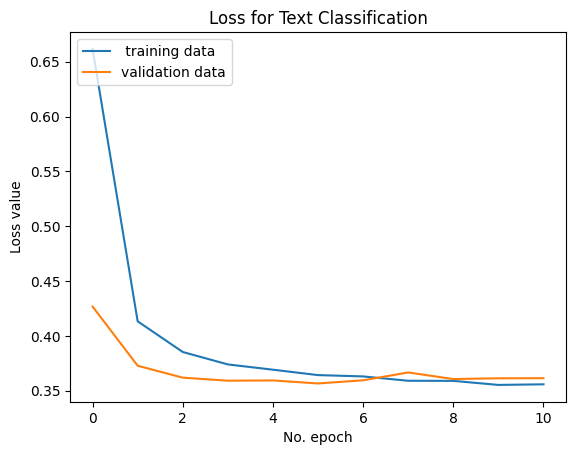

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

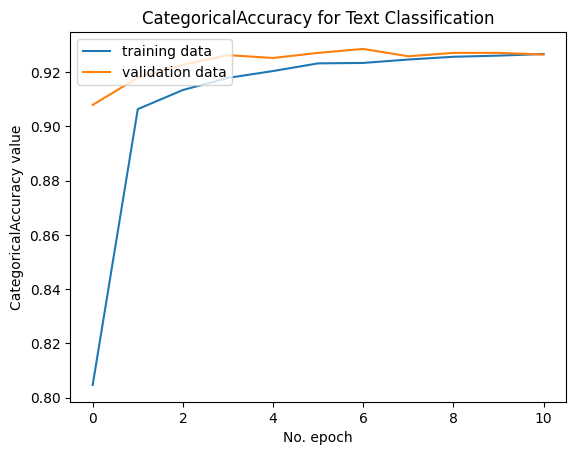

In [40]:
# Plot the training and validation accuracy
plt.plot(history.history['categorical_accuracy'], label='training data')
plt.plot(history.history['val_categorical_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [41]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model1.h5')

In [42]:
print("Generate predictions for all samples")
x_test  = pad_sequences(tokenizer.texts_to_sequences(test_data['CleanText'].tolist()), maxlen=160, padding='post')
predictions = best_model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Generate predictions for all samples
375/375 [==============================] - 1s 1ms/step
[[0.8770745  0.16375352 0.20529516]
 [0.32052267 0.30129382 0.68298817]
 [0.92079425 0.24582906 0.09086905]
 ...
 [0.22149043 0.8728732  0.23334388]
 [0.21525775 0.90831137 0.18631485]
 [0.17371026 0.13230637 0.91565335]]


In [43]:
print(predict_results.shape)
if len(predict_results.shape) == 1:
    y_pred = predict_results
else:
    y_pred = np.argmax(predict_results, axis=1)

print(y_pred)

(12000,)
[0 2 0 ... 1 1 2]


In [45]:
from sklearn.metrics import accuracy_score
y_test = test_data['sentiment_vader'].tolist()
train_labels = le.fit_transform(y_test)
y_test = train_labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.07%


Text(50.722222222222214, 0.5, 'y_pred')

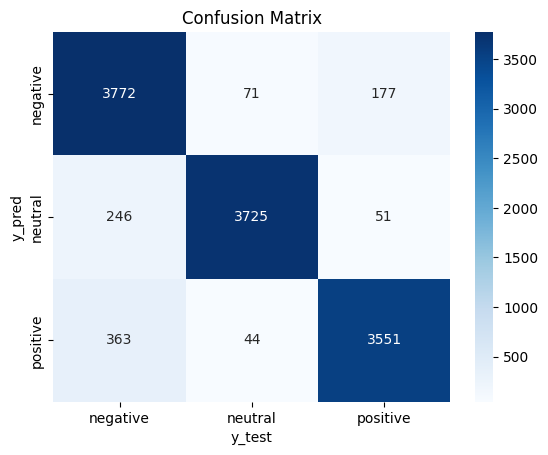

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [49]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    negative       0.86      0.94      0.90      4020
     neutral       0.97      0.93      0.95      4022
    positive       0.94      0.90      0.92      3958

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



In [50]:
from IPython.display import display

separated_app_data = ['app1_data1_separated', 'app2_data1_separated'] # Name accordingly for more apps 
review_data_sources = ['ReviewData1', 'ReviewData2']  # List of corresponding review data sources

separated_data = {}
unique_separated_data = {}

for app, review_source in zip(separated_app_data, review_data_sources):
    separated_data[app] = combined_app_data_vader[combined_app_data_vader['source'] == review_source].drop(columns=['source'])
    
    # Exclude matching data using a merge with indicator
    merged_data = separated_data[app].merge(balanced_data_CA_vader, how='left', indicator=True)
    unique_separated_data[app] = merged_data[merged_data['_merge'] == 'left_only'].drop(columns=['_merge', 'source'])
    
    print(f'{app} DataFrame\n\n')
    unique_separated_data[app].reset_index(drop=True, inplace=True)
    display(unique_separated_data[app])
    print('\n\n')


app1_data1_separated DataFrame




,ID,CleanText,rating,sentiment_vader,num_characters,num_words,num_sentences
0,3,great easy navigate use super easy,5,positive,34,6,1
1,5,easy use great rates love meeting host super f...,5,positive,76,13,1
2,7,host unavailable due overseas wait hour enter ...,1,positive,314,40,1
3,8,good easy reference customers dont reply,4,positive,40,6,1
4,9,dumpster fire,1,negative,13,2,1
...,...,...,...,...,...,...,...
76853,147595,love work actually useful travelers look cheap...,5,positive,58,9,1
76854,147596,please add search filters pets allow,2,positive,36,6,1
76855,147598,since last time update featured collection cat...,3,negative,148,24,1
76856,147599,useful ive use quickly compose messages hosts ...,4,positive,72,10,1





app2_data1_separated DataFrame




,ID,CleanText,rating,sentiment_vader,num_characters,num_words,num_sentences
0,1,customer support available though marked websi...,1,positive,282,43,1
1,2,trust issues sell fake hotel,1,positive,28,5,1
2,4,slow,3,neutral,4,1,1
3,5,bad hard talk customer service request refund ...,1,negative,69,11,1
4,7,ok whatever,2,positive,11,2,1
...,...,...,...,...,...,...,...
40237,84689,try type venice search function crashes immedi...,1,negative,56,8,1
40238,84692,clean room many facilities u ask towel soap mi...,5,positive,327,55,1
40239,84693,good guide travels asia good choice hotels pic...,2,positive,242,38,1
40240,84694,useful times use,4,positive,16,3,1


In [53]:
for app_key in separated_app_data:
  print(f"Generate predictions for all samples of {app_key}")
  test_sequences_apps = tokenizer.texts_to_sequences(unique_separated_data[app_key]['CleanText'])
  test_padded_apps = pad_sequences(test_sequences_apps, padding='post', maxlen=max_length)  
  predictions_apps = best_model.predict(test_padded_apps)
  predict_results_apps = predictions_apps.argmax(axis=1)
  print(predict_results_apps.shape)
  if len(predict_results_apps.shape) == 1:
     y_pred_apps = predict_results_apps
  else:
     y_pred_apps = np.argmax(predict_results_apps, axis=1)
  y_test_apps = le.transform(unique_separated_data[app_key]['sentiment_vader'])
  accuracy_apps = accuracy_score(y_test_apps, y_pred_apps)  
  print('\n', y_pred_apps)
  print(f'\nAccuracy of {app_key}: {accuracy_apps * 100:.2f}%')  
  print('\n')

Generate predictions for all samples of app1_data1_separated
2402/2402 [==============================] - 2s 1ms/step
(76858,)

 [2 2 0 ... 0 2 0]

Accuracy of app1_data1_separated: 90.97%


Generate predictions for all samples of app2_data1_separated
1258/1258 [==============================] - 1s 1ms/step
(40242,)

 [2 0 1 ... 2 2 2]

Accuracy of app2_data1_separated: 91.77%


